In [97]:
import matplotlib.pyplot as plt
import matplotlib.colors as color
import numpy as np
import random

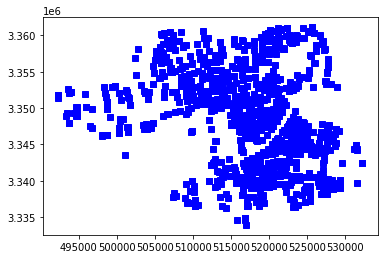

In [ ]:
# data=np.load("杭州xyn.npy")
data=np.load("杭州mergedXY.npy")

# print(data)
demandCoordinates=[(data[i][0],data[i][1]) for i in range(data.shape[0])]
size=data.shape[0]
A=[(i,j) for i in range(size) for j in range(size)]
N=[i for i in range(size)]
pop_density=np.load("pop_density.npy")
for xy in demandCoordinates:
    plt.plot(xy[0],xy[1],c="b",marker="s")
pop_sum=np.sum(pop_density)
pop_average=pop_sum/size

In [99]:
# cof=1.2
# ablty=pop_average*10
# p=cof*np.sum(pop_density)/ablty
# q=[pop_density[i] for i in N]
q=[pop_density[i] for i in N]
p=300
ablty=1.5*pop_sum/p
ablty

49524.23529411765

In [100]:

geo_dis={(i,j):np.hypot(demandCoordinates[i][0]-demandCoordinates[j][0],demandCoordinates[i][1]-demandCoordinates[j][1]) for i,j in A}   #几何距离
# od=np.load("杭州ODN.npy")
od=np.load("杭州mergedOD.npy")   #np格式的od矩阵
od_dis={(i,j):od[i][j] for i,j in A}  #字典格式的od矩阵
dis=od_dis

In [101]:
from gurobipy import Model, GRB , quicksum

In [102]:
mdl=Model("p-center")


In [103]:
x=mdl.addVars(A,vtype=GRB.CONTINUOUS,ub=1,lb=0)
# x=mdl.addVars(A,vtype=GRB.BINARY)
n=mdl.addVars(N,vtype=GRB.INTEGER)
mdl.update()

In [104]:
mdl.ModelSense=GRB.MINIMIZE
mdl.setObjective(quicksum(x[i,j]*dis[i,j]*q[j] for i,j in A))

In [105]:
mdl.addConstrs(quicksum(x[i,j] for j in N)== 1 for i in N);

In [106]:
mdl.addConstr(quicksum(n[i] for i in N )== p);

In [107]:
mdl.addConstrs((quicksum(q[i]*x[i,j] for i in N)<=n[j]*ablty )for j in N);

In [111]:
mdl.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2909 rows, 2115570 columns and 4231140 nonzeros
Model fingerprint: 0xb9bec146
Variable types: 2114116 continuous, 1454 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+04]
  Objective range  [6e+03, 4e+08]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+02]
Presolved: 2908 rows, 2115569 columns, 4231138 nonzeros

Continuing optimization...

 11613  6747 1.9364e+09   62   87 1.9790e+09 1.9274e+09  2.61%  12.0 1711s
 11697  6787 1.9353e+09   68   99 1.9790e+09 1.9274e+09  2.61%  12.6 1723s
 11769  6877 1.9409e+09   68   99 1.9790e+09 1.9274e+09  2.61%  12.5 1733s
 11889  6922 1.9410e+09   76   97 1.9790e+09 1.9274e+09  2.61%  12.5 1742s
 12002  6977 1.9459e+09   83   92 1.9790e+09 1.9274e+09  2.61%  12.5 1749s
 12113  7038 1.9543e+09   91   91 1.9790e+09 1.9274e+09  2.61%  12.4 1758s
 12221  7

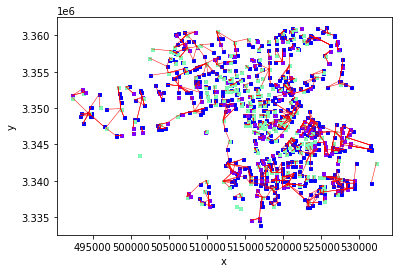

In [110]:
# 画所有点及标注需求
markersize=3
linewidth=0.5
for i in N:
    xy=demandCoordinates[i]
    plt.plot(xy[0],xy[1],c="b",marker="s",markersize=markersize)
    #plt.text(xy[0],xy[1],f"{q[i]}")

# 画需求量
for i in N:
    if (n[i].x>0):
        xy=demandCoordinates[i]
        col=plt.cm.rainbow
        nMax=0.0
        for ni in N:
            # print(type(n[ni].x),n[ni].x,type(nMax))
            if n[ni].x>nMax:
                nMax=n[ni].x
        norm=color.Normalize(vmax=round(nMax)+1,vmin=0)
        plt.plot(xy[0],xy[1],marker="s",color=col(norm(n[i].x)),markersize=markersize)
        # plt.text(xy[0]-5,xy[1]-5,f"{n[i].x}",color="b")
        

# 画供应线
for i,j in A:
    if x[i,j].x>0.0:
        demandCoordinates[i][0],demandCoordinates[i][1]
        demandCoordinates[j][0],demandCoordinates[j][1]
        plt.plot([demandCoordinates[i][0],demandCoordinates[j][0]],[demandCoordinates[i][1],demandCoordinates[j][1]],color="r",linewidth=linewidth)



plt.xlabel("x")
plt.ylabel("y")
plt.show()
    

In [ ]:
sum=0
tt=[]
for i in N:
    print(round(n[i].x),end=",")
    tt.append(round(n[i].x))
(tt)

1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,1,1,0,0,0,1,1,0,1,1,1,2,2,1,1,1,2,1,2,0,0,2,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,0,1,1,2,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,2,1,1,1,1,1,0,1,0,2,2,2,1,1,2,1,2,1,1,2,2,0,2,2,1,2,1,1,1,1,1,2,2,2,2,0,1,1,2,2,1,1,1,1,1,1,1,1,1,0,2,1,2,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,3,2,1,2,1,2,1,2,2,1,1,1,0,1,1,1,1,2,1,1,2,2,1,1,2,1,2,1,0,2,2,1,0,2,2,1,1,1,2,2,1,1,0,1,2,2,2,1,2,1,2,2,2,2,2,1,2,2,1,1,2,2,1,2,1,2,1,2,2,2,2,2,2,2,2,2,0,2,2,1,2,0,0,2,0,1,2,1,1,2,2,4,0,2,2,2,2,2,2,1,1,0,0,1,0,2,1,2,1,2,2,2,2,2,1,3,1,1,2,2,1,1,2,2,1,2,1,1,1,0,2,1,2,2,2,2,1,2,2,2,2,2,1,2,2,1,2,2,1,0,1,0,2,2,2,1,1,1,0,2,2,2,2,2,2,2,1,2,1,2,2,2,0,2,1,0,1,2,2,2,2,2,1,2,2,0,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,1,2,2,2,2,2,2,2,1,2,2,0,2,2,2,4,2,2,1,3,2,2,2,2,0,2,2,0,1,2,2,1,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,2,2,2,2,2,2,2,1,1,3,2,2,2,2,2,2,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,

4

In [ ]:
array=np.array([])
for i in N:
    array=np.append(array,n[i].x)
array
np.save("n.npy",array)

array2=np.zeros((size,size))
for i,j in A:
    array2[i,j]=x[i,j].x
np.save("x.npy",array2)